<a href="https://colab.research.google.com/github/sizhky/icevision/blob/master/dental-notebooks/Ross_efficient_det.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
!bash install_colab.sh

--2021-08-06 18:29:24--  https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1244 (1.2K) [text/plain]
Saving to: ‘install_colab.sh’

install_colab.sh    100%[===================>]   1.21K  --.-KB/s    in 0s      

2021-08-06 18:29:25 (59.9 MB/s) - ‘install_colab.sh’ saved [1244/1244]

Installing icevision + dependencices for CUDA 10
Uninstalling some dependencies to prevent errors
Found existing installation: torchvision 0.10.0+cu102
Uninstalling torchvision-0.10.0+cu102:
  Successfully uninstalled torchvision-0.10.0+cu102
Found existing installation: fastai 1.0.61
Uninstalling fastai-1.0.61:
  Successfully uninstalled fastai-1.0.61
Installing some dependencies to prevent errors
     |██

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/icevision'

test5  test5.zip


In [ ]:
!unzip -q /content/test5.zip -d /content/

Archive:  /content/drive/My Drive/icevision/test5.zip
   creating: /content/drive/My Drive/icevision/test5/annotations/
  inflating: /content/drive/My Drive/icevision/test5/annotations/1.xml  
  inflating: /content/drive/My Drive/icevision/test5/annotations/10.xml  
  inflating: /content/drive/My Drive/icevision/test5/annotations/100.xml  
  inflating: /content/drive/My Drive/icevision/test5/annotations/1000.xml  
  inflating: /content/drive/My Drive/icevision/test5/annotations/101.xml  
  inflating: /content/drive/My Drive/icevision/test5/annotations/102.xml  
  inflating: /content/drive/My Drive/icevision/test5/annotations/103.xml  
  inflating: /content/drive/My Drive/icevision/test5/annotations/104.xml  
  inflating: /content/drive/My Drive/icevision/test5/annotations/105.xml  
  inflating: /content/drive/My Drive/icevision/test5/annotations/106.xml  
  inflating: /content/drive/My Drive/icevision/test5/annotations/107.xml  
  inflating: /content/drive/My Drive/icevision/test5/anno

WARNING  - This function will be deprecated, instantiate the concrete classes instead: `VOCBBoxParser`, `VOCMaskParser` | icevision.parsers.voc_parser:voc:18


  0%|          | 0/1000 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:136


  0%|          | 0/800 [00:00<?, ?it/s]

AUTOFIX-SUCCESS - (record_id: 939) - Clipping bbox ymax from 644 to image height 638 (Before: <BBox (xmin:863, ymin:624, xmax:887, ymax:644)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 939) - Clipping bbox ymax from 644 to image height 638 (Before: <BBox (xmin:911, ymin:624, xmax:935, ymax:644)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 619) - Clipping bbox ymax from 716 to image height 708 (Before: <BBox (xmin:958, ymin:693, xmax:984, ymax:716)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 619) - Clipping bbox ymax from 716 to image height 708 (Before: <BBox (xmin:1011, ymin:693, xmax:1037, ymax:716)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 173) - Clipping bbox ymax from 669 to image height 667 (Before: <BBox (xmin:901, ymin:647, xmax:926, ymax:669)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 173) - Clipping bbox ym

  0%|          | 0/200 [00:00<?, ?it/s]

AUTOFIX-SUCCESS - (record_id: 795) - Clipping bbox ymax from 640 to image height 635 (Before: <BBox (xmin:860, ymin:620, xmax:883, ymax:640)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 795) - Clipping bbox ymax from 640 to image height 635 (Before: <BBox (xmin:907, ymin:620, xmax:931, ymax:640)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 412) - Clipping bbox ymax from 871 to image height 864 (Before: <BBox (xmin:1162, ymin:843, xmax:1194, ymax:871)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 412) - Clipping bbox ymax from 871 to image height 864 (Before: <BBox (xmin:1227, ymin:843, xmax:1259, ymax:871)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 669) - Clipping bbox ymax from 822 to image height 816 (Before: <BBox (xmin:1108, ymin:796, xmax:1139, ymax:822)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 669) - Clipping bbo

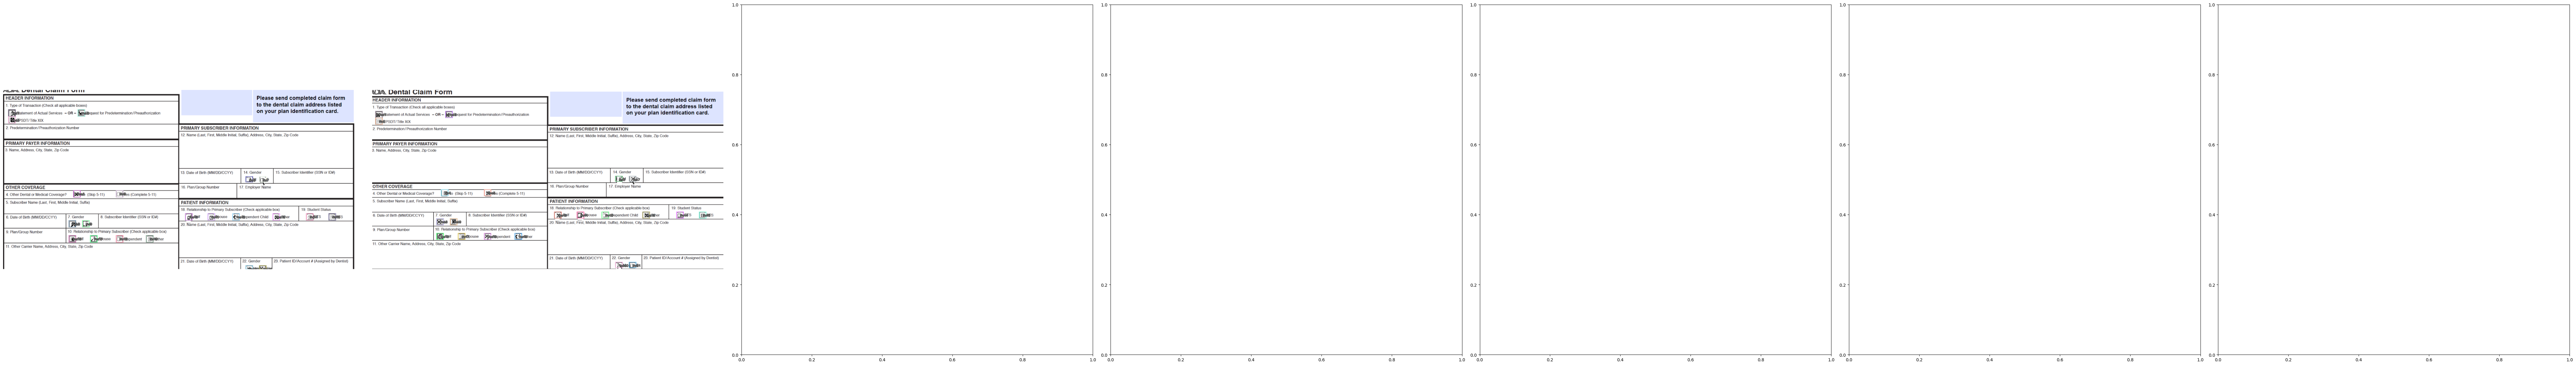

In [ ]:
from icevision.all import *
data_dir = Path('drive/My Drive/icevision/test5')
images_dir = data_dir / 'images'
annotations_dir = data_dir / 'annotations'
class_map = ClassMap(['YES1','NO1','YES2','NO2','YES3','NO3','YES4','NO4','YES5','NO5','YES6','NO6','YES7','NO7','YES8','NO8','YES9','NO9',
                      'YES10','NO10','YES11','NO11','YES12','NO12','YES13','NO13','YES14','NO14','YES15','NO15','YES16','NO16','YES17','NO17',
                      'YES18','NO18','YES19','NO19','YES20','NO20','YES21','NO21'])
parser = parsers.voc(annotations_dir=annotations_dir, images_dir=images_dir, class_map=class_map)
data_splitter = RandomSplitter((.8, .2))
#print(len(train_records))
train_records, valid_records = parser.parse(data_splitter)
show_records(train_records[0:2], ncols=7, class_map=class_map)

In [ ]:
image_size = 384
train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=image_size, presize=512), tfms.A.Normalize()])
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size), tfms.A.Normalize()])
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)

In [ ]:
print(valid_ds[0])

BaseRecord

common: 
	- Record ID: 19
	- Filepath: test6/images/4.png
	- Img: 384x384x3 <np.ndarray> Image
	- Image size ImgSize(width=384, height=384)
detection: 
	- Class Map: <ClassMap: {'background': 0, 'YES1': 1, 'NO1': 2, 'YES2': 3, 'NO2': 4, 'YES3': 5, 'NO3': 6, 'YES4': 7, 'NO4': 8, 'YES5': 9, 'NO5': 10, 'YES6': 11, 'NO6': 12, 'YES7': 13, 'NO7': 14, 'YES8': 15, 'NO8': 16, 'YES9': 17, 'NO9': 18, 'YES10': 19, 'NO10': 20, 'YES11': 21, 'NO11': 22, 'YES12': 23, 'NO12': 24, 'YES13': 25, 'NO13': 26, 'YES14': 27, 'NO14': 28, 'YES15': 29, 'NO15': 30, 'YES16': 31, 'NO16': 32, 'YES17': 33, 'NO17': 34, 'YES18': 35, 'NO18': 36, 'YES19': 37, 'NO19': 38, 'YES20': 39, 'NO20': 40, 'YES21': 41, 'NO21': 42}>
	- Labels: [2, 3, 6, 7, 10, 12, 14, 16, 17, 19, 22, 24, 25, 28, 30, 32, 34, 35, 38, 40, 42]
	- BBoxes: [<BBox (xmin:3.4856278366111955, ymin:117.52, xmax:11.037821482602117, ymax:124.77925925925925)>, <BBox (xmin:80.45990922844175, ymin:117.52, xmax:87.72163388804842, ymax:124.77925925925925)>

In [ ]:
extra_args = {}
model_type = models.ross.efficientdet
backbone = model_type.backbones.tf_lite0
# The efficientdet model requires an img_size parameter
extra_args['img_size'] = image_size
model_type, backbone, extra_args

(<module 'icevision.models.ross.efficientdet' from '/usr/local/lib/python3.7/dist-packages/icevision/models/ross/efficientdet/__init__.py'>,
 {'img_size': 384})

In [ ]:
model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(parser.class_map), **extra_args) 

Downloading: "https://github.com/rwightman/efficientdet-pytorch/releases/download/v0.1/tf_efficientdet_lite0-f5f303a9.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientdet_lite0-f5f303a9.pth


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


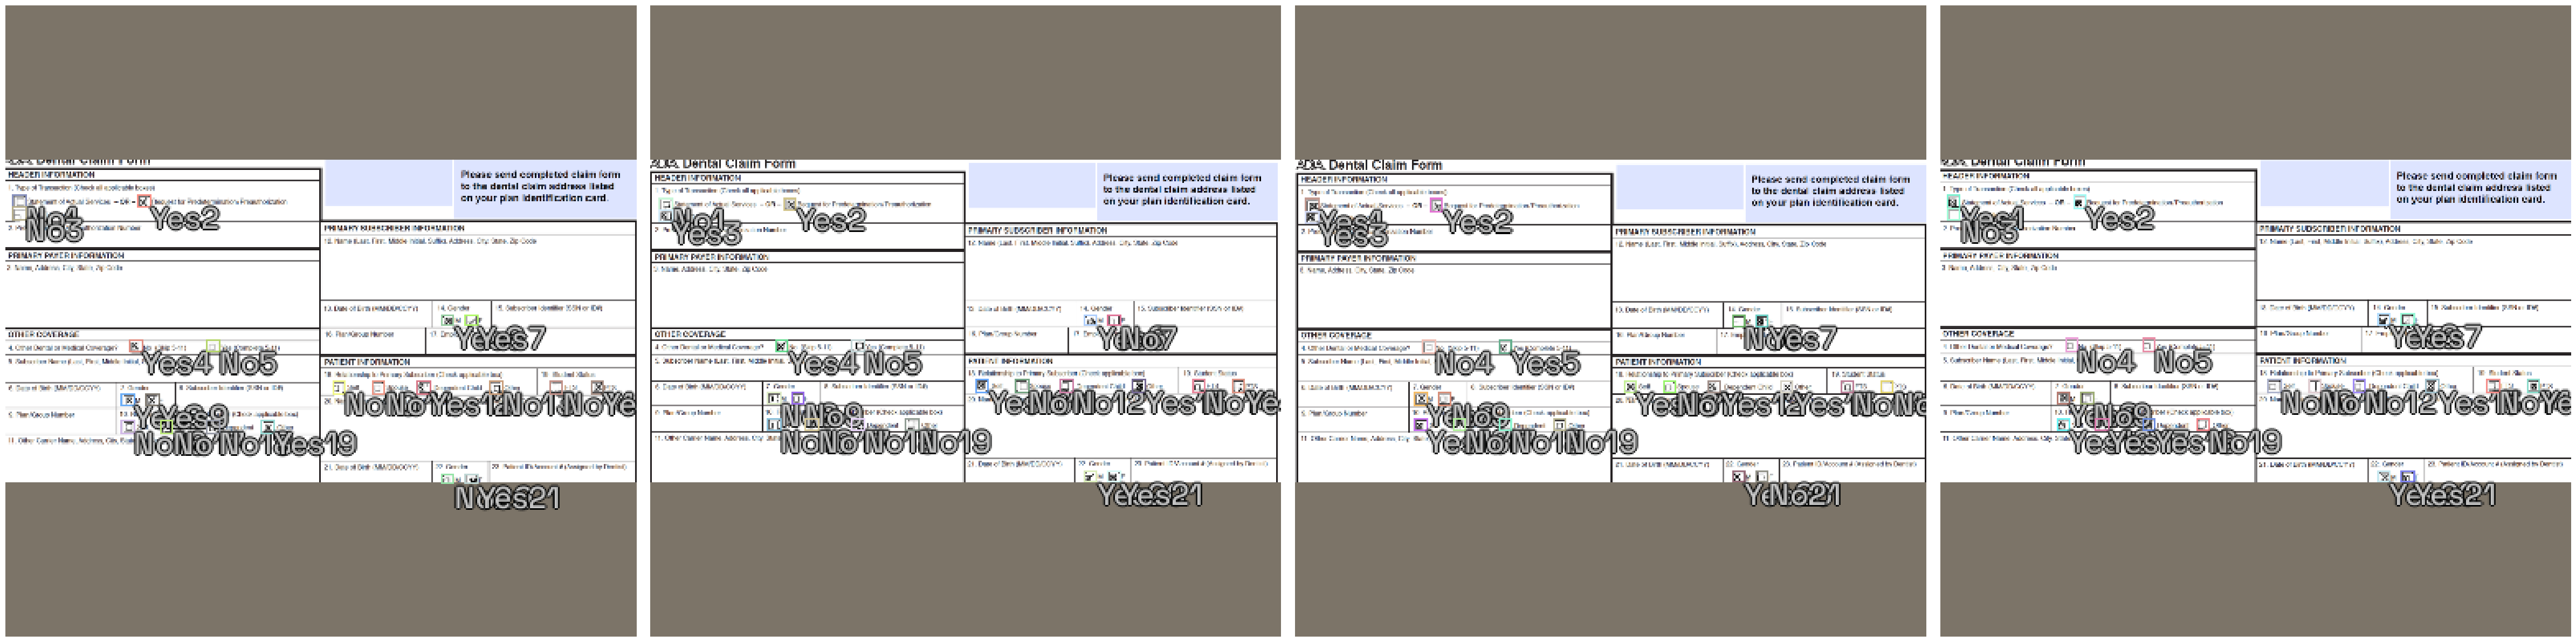

In [ ]:
train_dl = model_type.train_dl(train_ds, batch_size=4, num_workers=4, shuffle=True)
valid_dl = model_type.valid_dl(valid_ds, batch_size=4, num_workers=4, shuffle=False)
model_type.show_batch(first(valid_dl), ncols=4)

In [ ]:
%debug

> /usr/local/lib/python3.7/dist-packages/torch/_utils.py(429)reraise()
    427             # have message field
    428             raise self.exc_type(message=msg)
--> 429         raise self.exc_type(msg)
    430 
    431 

ipdb> u
> /usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py(1225)_process_data()
   1223         self._try_put_index()
   1224         if isinstance(data, ExceptionWrapper):
-> 1225             data.reraise()
   1226         return data
   1227 

ipdb> u
> /usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py(1199)_next_data()
   1197             else:
   1198                 del self._task_info[idx]
-> 1199                 return self._process_data(data)
   1200 
   1201     def _try_put_index(self):

ipdb> data
ipdb> u
> /usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py(530)__next__()
    528                                  "https://pytorch.org/docs/stable/data.html#torch.utils.data.IterableDataset for exam


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.7/bdb.py", line 357, in set_quit
    sys.settrace(None)



SuggestedLRs(lr_min=0.03630780577659607, lr_steep=3.311311274956097e-06)

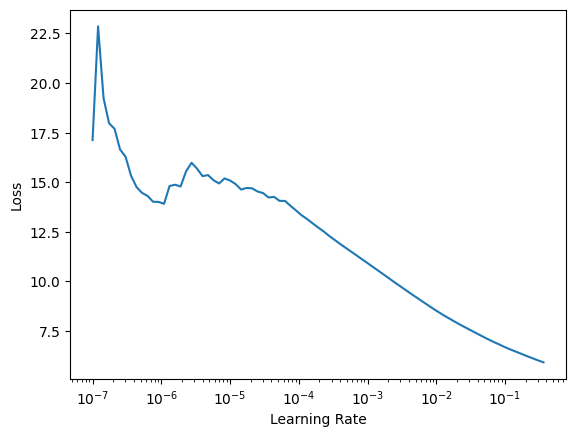

In [ ]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]
learn = model_type.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)
learn.lr_find()

In [ ]:
learn.fine_tune(100, 1e-4, freeze_epochs=3)

epoch,train_loss,valid_loss,COCOMetric,time
0,2.247108,1.881305,0.000000,01:14
1,1.967264,1.645988,0.000000,01:13
2,1.728668,1.500337,0.000000,01:13


epoch,train_loss,valid_loss,COCOMetric,time
0,1.654585,1.458034,0.000010,01:17
1,1.621861,1.426263,0.000009,01:15
2,1.603533,1.392874,0.000025,01:15
3,1.576818,1.373786,0.000027,01:18
4,1.560330,1.355476,0.000017,01:19
5,1.534103,1.340287,0.000035,01:18
6,1.503142,1.317352,0.000069,01:16
7,1.485903,1.294568,0.000113,01:16
8,1.446613,1.276409,0.000186,01:15
9,1.430327,1.250083,0.000162,01:15


In [ ]:
infer_dl = model_type.infer_dl(valid_ds, batch_size=1, shuffle=False)
preds = model_type.predict_from_dl(model, infer_dl, detection_threshold=0.35, keep_images=True)

  0%|          | 0/200 [00:00<?, ?it/s]

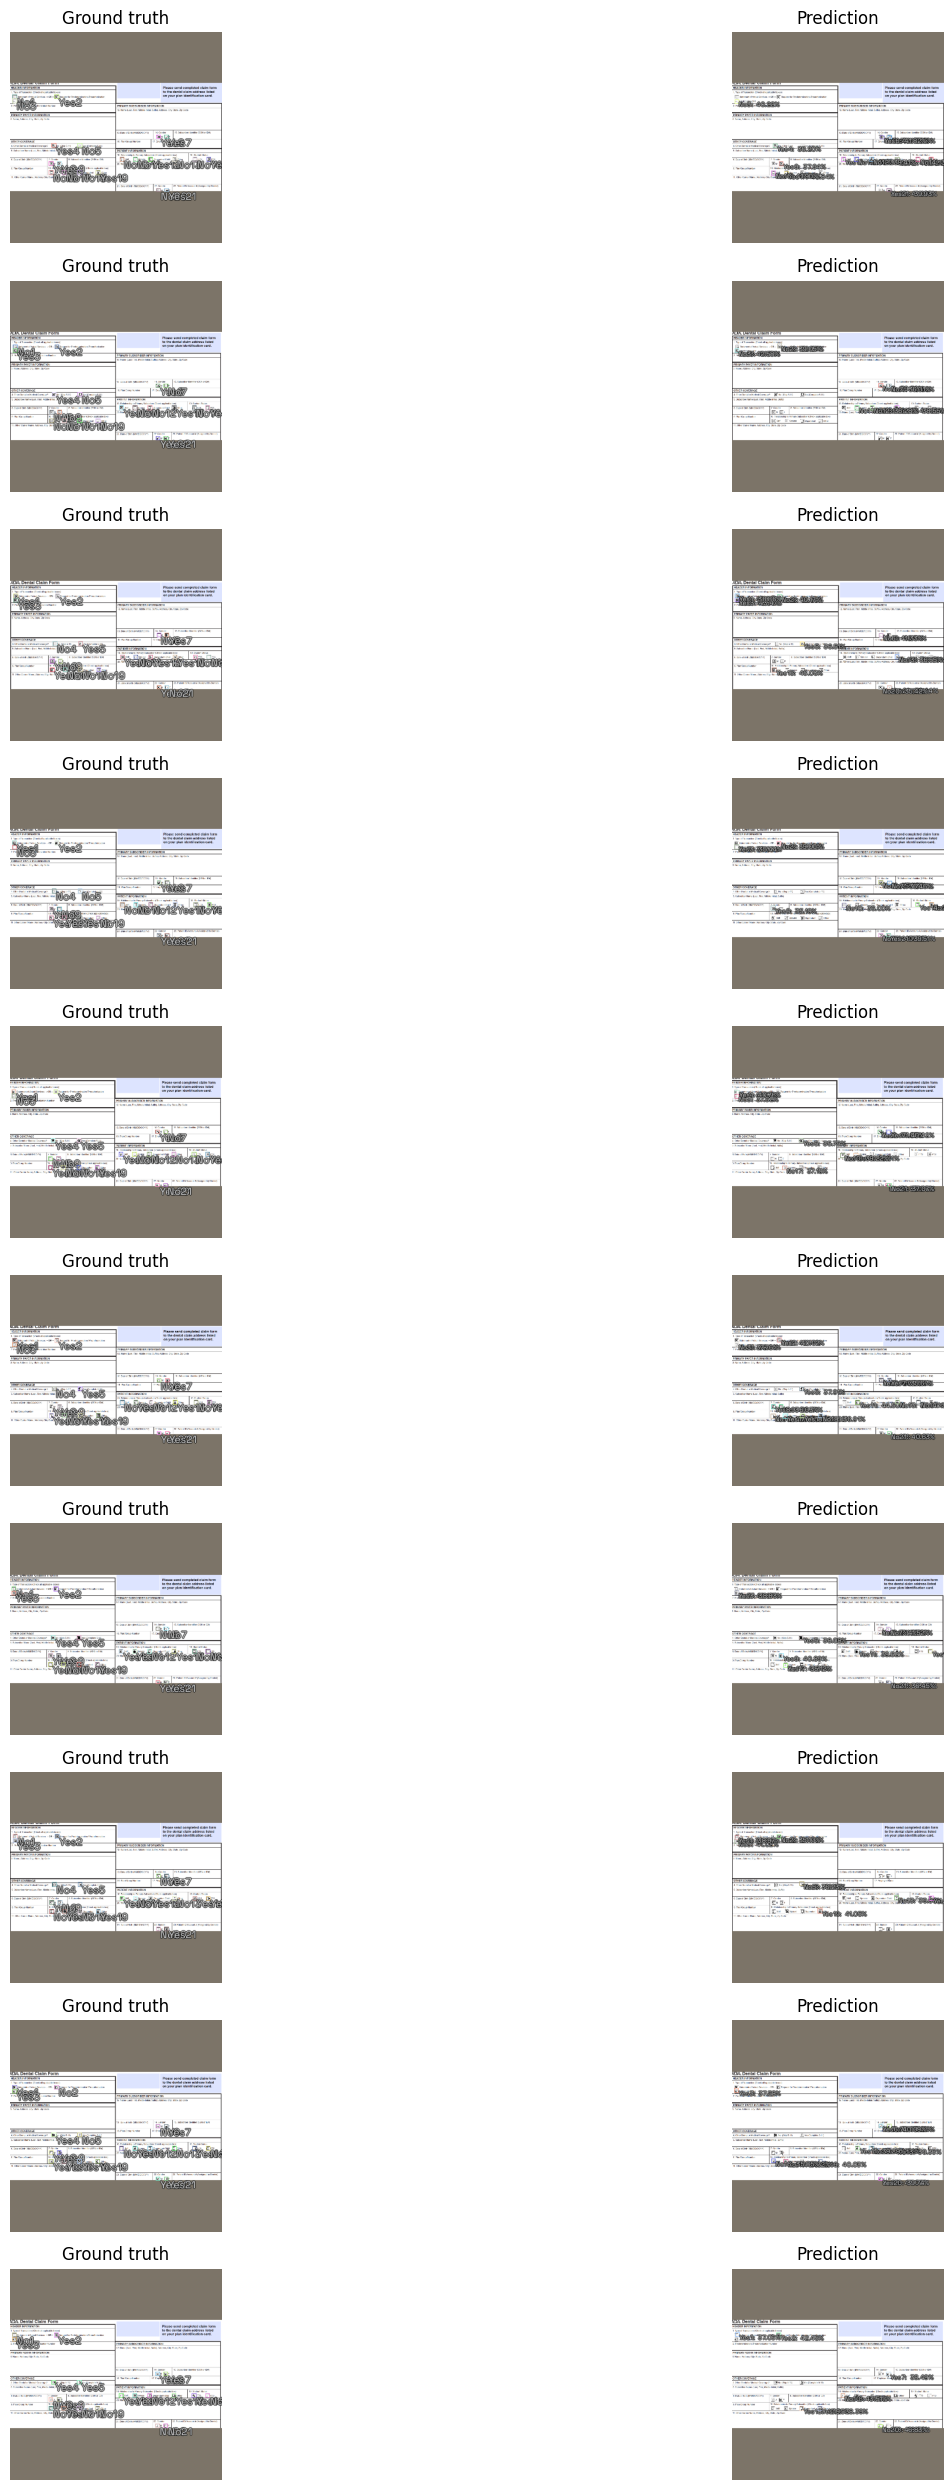

In [ ]:
N = 10
show_preds(preds=preds[:N], figsize=(20,int(2.5*N)), ncols=2)

In [ ]:
!pip install torch_snippets
from torch_snippets import load_torch_model_weights_to, save_torch_model_weights_from, makedir
makedir('drive/My Drive/icevision/icevision')
save_torch_model_weights_from(model, '0.pth')

INFO     - Saved weights of size ~13 MB to 0.pth | __main__:<module>:4
